In [ ]:
# https://stackoverflow.com/questions/54017871/question-about-autocorrelation-plot-result-vs-autocorr-result

In [2]:
DATAFOLDER = "data"
import pandas as pd
from preprocess import load_frame
# df = pd.read_csv("DATASET.csv")
df = load_frame()
df.head()

,date,symbol,open,high,low,close,volume btc,volume usd,datestamp,range,...,normalised,stationary,year,month,doy,dom,week,dow,dayname,hour
datestampindex,,,,,,,,,,,,,,,,,,,,,
2014-11-28,2014-11-28,BTCUSD,363.59,381.34,360.57,376.28,8617.15,3220878.18,2014-11-28,20.77,...,-0.956560,NaN,2014,11,332,28,48,4,Friday,0
2014-11-29,2014-11-29,BTCUSD,376.42,386.60,372.25,376.72,7245.19,2746157.05,2014-11-29,14.35,...,-0.956450,0.001169,2014,11,333,29,48,5,Saturday,0
2014-11-30,2014-11-30,BTCUSD,376.57,381.99,373.32,373.34,3046.33,1145566.61,2014-11-30,8.67,...,-0.957297,-0.009013,2014,11,334,30,48,6,Sunday,0
2014-12-01,2014-12-01,BTCUSD,376.40,382.31,373.03,378.39,6660.56,2520662.37,2014-12-01,9.28,...,-0.956032,0.013436,2014,12,335,1,49,0,Monday,0
2014-12-02,2014-12-02,BTCUSD,378.39,382.86,375.23,379.25,6832.53,2593576.46,2014-12-02,7.63,...,-0.955816,0.002270,2014,12,336,2,49,1,Tuesday,0


In [ ]:
from pandas.plotting import autocorrelation_plot
r = autocorrelation_plot(df.close)
print (r)

In [2]:
col = "close"
corr_d = {
    "autocorrelation": [],
}
length = len(df) - 1
for lag in range(length):
    if lag == 0:
        corr_d["autocorrelation"].append(1)
        continue
    corr_d["autocorrelation"].append(df[col].autocorr(lag))
df_ac = pd.DataFrame(corr_d)

import plotly.express as px
px.line(x=df_ac.index, y=df_ac.autocorrelation)

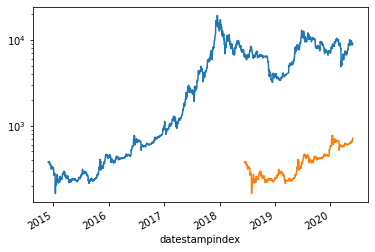

In [4]:
df[col].plot(logy=True)
df[col].shift(1294).plot(logy=True)

In [3]:
import pandas as pd
import numpy as np

# https://stats.stackexchange.com/questions/111840/library-routine-for-rolling-window-lag-1-autocorrelation

features = []
for lag_i in range(10, 30):
    feature = f"ac{lag_i}"
    features.append(feature)
    df[feature] = df["close"].rolling(40).apply(lambda x: pd.Series(x).autocorr(lag=lag_i))
df = df.fillna(0)
df[features].T


datestampindex,2014-11-28,2014-11-29,2014-11-30,2014-12-01,2014-12-02,2014-12-03,2014-12-04,2014-12-05,2014-12-06,2014-12-07,...,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27
ac10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.686209,0.708429,0.707562,0.701445,0.691213,0.666472,0.588624,0.515028,0.445222,0.338127
ac11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.640449,0.675973,0.678549,0.666856,0.651626,0.628892,0.559680,0.455752,0.373146,0.244325
ac12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.624953,0.666289,0.661257,0.626287,0.608337,0.583153,0.521605,0.416612,0.289120,0.216071
ac13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.630817,0.678572,0.656054,0.603189,0.569388,0.538388,0.475132,0.362113,0.283338,0.160670
ac14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.605548,0.649802,0.645081,0.562547,0.509001,0.453283,0.359507,0.303036,0.225400,0.136008
ac15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.562777,0.617765,0.615043,0.559968,0.478762,0.402467,0.269447,0.174462,0.116623,0.061625
ac16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.452492,0.523724,0.518189,0.449886,0.384826,0.298035,0.113773,-0.004607,-0.058914,-0.119040
ac17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.391032,0.478677,0.471695,0.396300,0.333561,0.251397,0.037627,-0.080467,-0.181940,-0.260933
ac18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.388299,0.498751,0.500342,0.401663,0.324753,0.248860,0.093901,-0.068293,-0.197205,-0.289896
ac19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.424518,0.591630,0.561998,0.420177,0.334475,0.266439,0.093356,-0.054713,-0.193013,-0.285038


In [4]:
# TODO http://traders.com/Documentation/FEEDbk_docs/2016/09/TradersTips.html
# https://quantstrattrader.wordpress.com/2017/02/15/ehlerss-autocorrelation-periodogram/
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1,shared_xaxes=True)

grid = df[features].T
print (grid.values)
df_line = df

trace_line = go.Scatter(x=df_line.index, y=df_line.close, mode="lines")
fig.add_trace(trace_line, row=1, col=1)

trace_map = go.Heatmap(x=grid.columns, y=grid.index, z=grid.values, showscale=True)
fig.add_trace(trace_map, row=2, col=1)

fig.show()


[[ 0.          0.          0.         ...  0.51502806  0.44522234
   0.33812708]
 [ 0.          0.          0.         ...  0.45575223  0.37314551
   0.24432523]
 [ 0.          0.          0.         ...  0.41661191  0.28911957
   0.21607138]
 ...
 [ 0.          0.          0.         ... -0.84934951 -0.80420792
  -0.8111891 ]
 [ 0.          0.          0.         ... -0.90058492 -0.93187819
  -0.82563994]
 [ 0.          0.          0.         ... -0.74237935 -0.79195142
  -0.82140031]]
